# Como Estimar Vendas 

In [1]:
#!pip install matplotlib

In [2]:

import matplotlib as plt
import numpy as np



In [3]:
import pandas as pd
print(pd.__version__)

2.2.2


In [4]:
#!pip install pandas

In [5]:
#pip show pandas
#!conda list openpyxl

In [6]:
#!pip install openpyxl

In [7]:
# Importando a base de vendas
base = pd.read_excel("investimento_vendas.xlsx")

# Exibindo as 5 primeiras linhas
base.head()

,Investimento em marketing,Venda Quantidades
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


In [8]:
#!jupyter nbextension disable --sys-prefix

In [9]:
#!pip install pandas jupyter

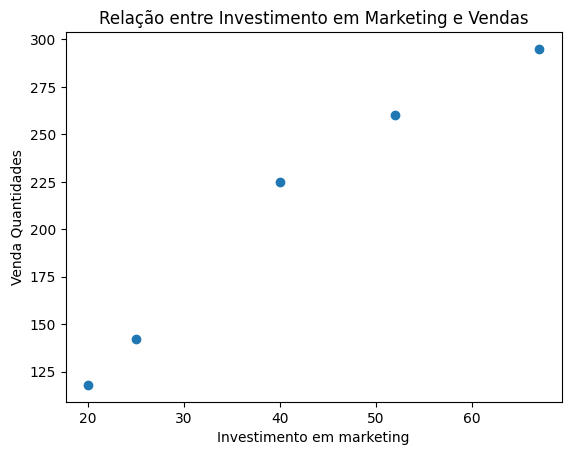

In [12]:
# Gráfico de dispersão
import matplotlib.pyplot as plt

plt.scatter(base["Investimento em marketing"], base["Venda Quantidades"])
plt.xlabel("Investimento em marketing")
plt.ylabel("Venda Quantidades")
plt.title("Relação entre Investimento em Marketing e Vendas")
plt.show()

In [13]:
print(base["Investimento em marketing"][0])

20


In [15]:
print(base["Venda Quantidades"][0])

118


In [18]:
print(base["Investimento em marketing"][4])

67


In [20]:
print(base["Venda Quantidades"][4])

295


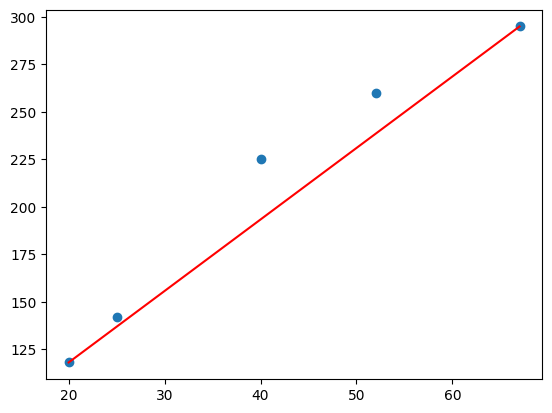

In [21]:

# Traçando uma reta passando por esses pontos
plt.scatter(base["Investimento em marketing"],base["Venda Quantidades"])
x0 = base["Investimento em marketing"][0]
y0 = base["Venda Quantidades"][0]
x1 = base["Investimento em marketing"][4]
y1 = base["Venda Quantidades"][4]
plt.plot([x0,x1],[y0,y1],"r")
plt.show()

In [ ]:
#!pip install --upgrade matplotlib

In [25]:
# criando um cenário ideal
def EncontraY(x_reta,y_reta,x):
	a = (y_reta[1] - y_reta[0])/(x_reta[1] - x_reta[0])
	b = y_reta[1] - a*x_reta[1]
	y = a*x + b
	return y




In [36]:
EncontraY([x0,x1],[y0,y1],58)


261.10638297872345

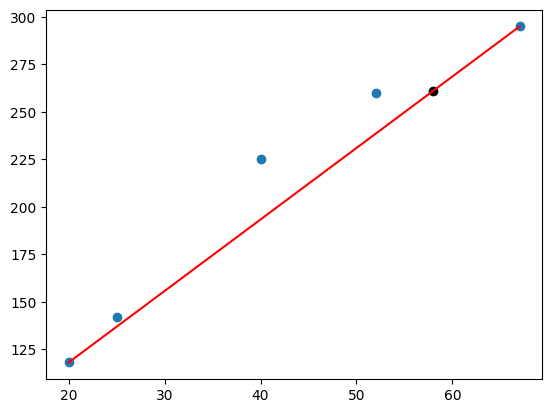

In [35]:
plt.scatter(base["Investimento em marketing"],base["Venda Quantidades"])
plt.scatter(58,EncontraY([x0,x1],[y0,y1],58),color="k")
x0 = base["Investimento em marketing"][0]
y0 = base["Venda Quantidades"][0]
x1 = base["Investimento em marketing"][4]
y1 = base["Venda Quantidades"][4]
plt.plot([x0,x1],[y0,y1],"r")
plt.show() 

Podemos então utilizar a equação da reta para determinar a quantidade de estoque baseado no nosso valor inicial de 75.000 em marketing.

Agora nós vamos utilizar o scikit learn para importar o modelo de regressão linear no Python.

In [39]:
#!pip install scikit-learn

In [40]:
from sklearn import linear_model

In [41]:
reg = linear_model.LinearRegression()


In [42]:
reg.fit(base["Investimento em marketing"].values.reshape(-1,1),base["Venda Quantidades"])


LinearRegression()

In [43]:
reg.coef_

array([3.85536527])

In [44]:
reg.intercept_


50.70109713674074

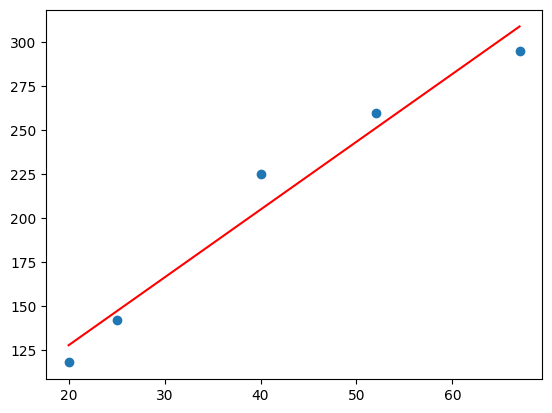

In [45]:
plt.scatter(base["Investimento em marketing"],base["Venda Quantidades"])
x = np.array(base["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

Usando machine learning para descobrir a venda
Veja que temos uma reta muito parecida com a que traçamos anteriormente, só que nesse caso tivemos menos trabalho e não precisamos criar nada de forma manual para tentar descobrir qual é a função para descobrir o valor de estoque.

In [46]:
reg.predict([[58]])


array([274.31228258])

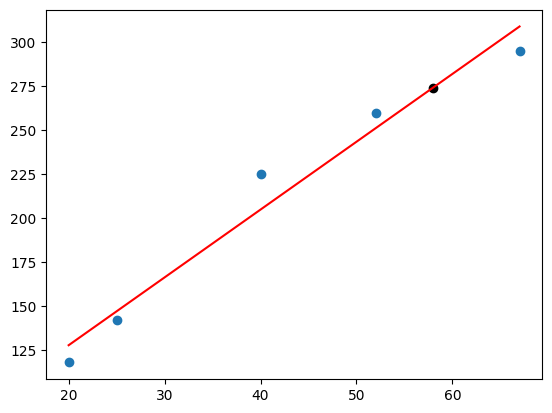

In [48]:
plt.scatter(base["Investimento em marketing"],base["Venda Quantidades"])
plt.scatter(58,reg.predict([[58]])[0],color="k")
x = np.array(base["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

Eestimativa de vendas utilizando a regressão linear que vai calcular a combinação linear mais próxima dos dados que temos.

